# Papaya classification Using Image Data Generators

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
N_CLASSES = 5
EPOCHS=20

In [3]:
from collections import Counter
import os

train_dir = 'papaya_dataset_classified/train'
class_names = ['Anthracnose', 'BacterialSpot', 'Curl', 'Healthy', 'RingSpot']
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

print("Class distribution:", class_counts)
print("Total samples:", sum(class_counts.values()))

Class distribution: {'Anthracnose': 409, 'BacterialSpot': 409, 'Curl': 409, 'Healthy': 409, 'RingSpot': 409}
Total samples: 2045


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'papaya_dataset_classified/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2045 images belonging to 5 classes.


In [9]:
train_generator.class_indices

{'Anthracnose': 0, 'BacterialSpot': 1, 'Curl': 2, 'Healthy': 3, 'RingSpot': 4}

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Anthracnose', 'BacterialSpot', 'Curl', 'Healthy', 'RingSpot']

In [13]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.44199547 0.7137255  0.6862745 ]
  [0.429857   0.7205583  0.6956696 ]
  [0.4649115  0.7369071  0.7241461 ]
  ...
  [0.28682122 0.5691742  0.5257636 ]
  [0.31668738 0.5686275  0.5254902 ]
  [0.259365   0.51575434 0.46950692]]

 [[0.44163424 0.7137255  0.6862745 ]
  [0.43039885 0.72091955 0.69616634]
  [0.464776   0.7362749  0.7237398 ]
  ...
  [0.2867309  0.56908387 0.5257184 ]
  [0.3170938  0.5686275  0.5254902 ]
  [0.2584619  0.51498675 0.46869415]]

 [[0.44127297 0.7137255  0.6862745 ]
  [0.43094072 0.7212808  0.69666296]
  [0.46464056 0.7356428  0.72333336]
  ...
  [0.28664058 0.5689935  0.5256733 ]
  [0.31750017 0.5686275  0.5254902 ]
  [0.2575588  0.5142191  0.46788135]]

 ...

 [[0.29529393 0.4959147  0.43703425]
  [0.24323666 0.44525588 0.39344385]
  [0.2604229  0.45433998 0.4081673 ]
  ...
  [0.16178995 0.19058661 0.13333425]
  [0.17568158 0.15583548 0.11098076]
  [0.26561922 0.22232193 0.18495809]]

 [[0.21496123 0.41452575 0.34828407]
  [0.24808039 0.4447303  0.3870248 ]


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'papaya_dataset_classified/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 213 images belonging to 5 classes.


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'papaya_dataset_classified//test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 437 images belonging to 5 classes.


# Building the Model

In [20]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# Compiling the Model

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
# Calculate steps per epoch
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE


In [29]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

In [31]:
steps_per_epoch


64

In [33]:
validation_steps

7

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=64,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=1,
    epochs=40,
)

Epoch 1/40
64/64 [==============================] - 59s 855ms/step - loss: 1.5658 - accuracy: 0.2650 - val_loss: 1.5360 - val_accuracy: 0.2676
Epoch 2/40
64/64 [==============================] - 52s 807ms/step - loss: 1.3946 - accuracy: 0.3726 - val_loss: 1.5601 - val_accuracy: 0.2770
Epoch 3/40
64/64 [==============================] - 75s 1s/step - loss: 1.2902 - accuracy: 0.4621 - val_loss: 1.5536 - val_accuracy: 0.2723
Epoch 4/40
64/64 [==============================] - 54s 842ms/step - loss: 1.2509 - accuracy: 0.4778 - val_loss: 1.2414 - val_accuracy: 0.4742
Epoch 5/40
64/64 [==============================] - 50s 772ms/step - loss: 1.1516 - accuracy: 0.5438 - val_loss: 1.1570 - val_accuracy: 0.5211
Epoch 6/40
64/64 [==============================] - 44s 693ms/step - loss: 1.0633 - accuracy: 0.5707 - val_loss: 1.1251 - val_accuracy: 0.5587
Epoch 7/40
64/64 [==============================] - 42s 652ms/step - loss: 1.0412 - accuracy: 0.5756 - val_loss: 1.0435 - val_accuracy: 0.5587
Ep

In [37]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 7s 466ms/step - loss: 0.7748 - accuracy: 0.7117


In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

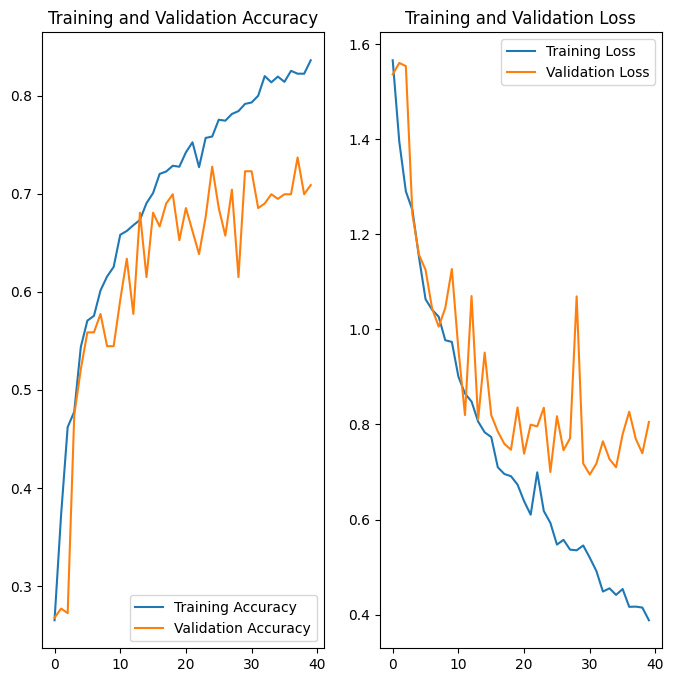

In [41]:
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Anthracnose
1/1 [==============================] - 0s 388ms/step
predicted label: Anthracnose


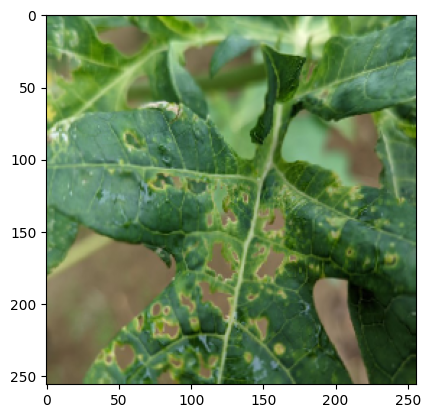

In [43]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 5ms/step


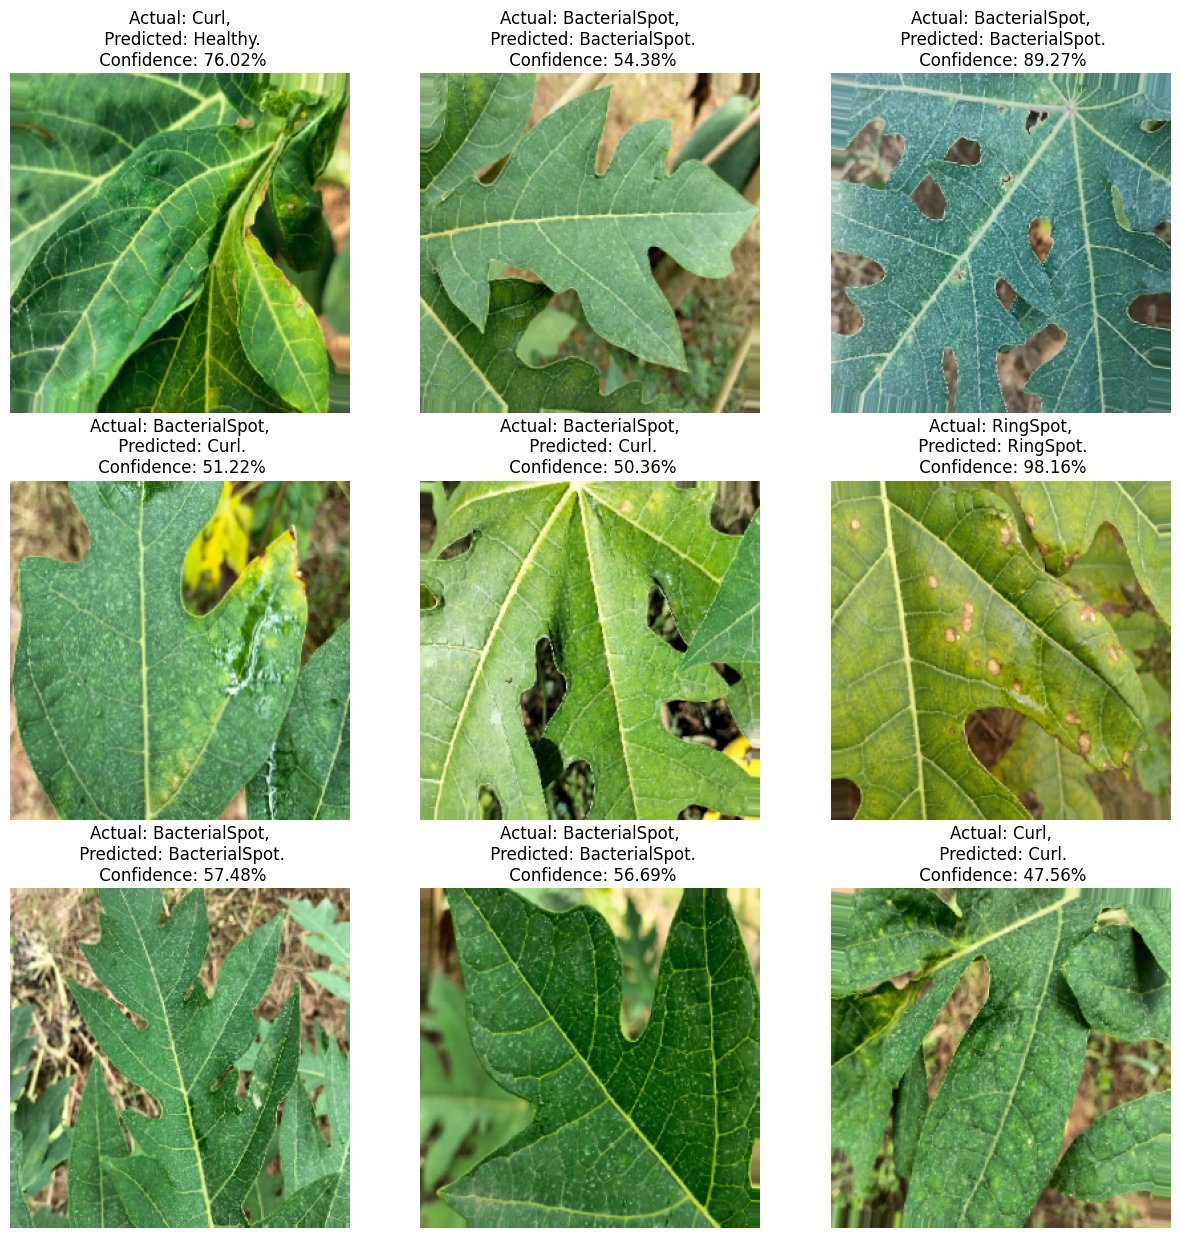

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [53]:
# Save the model in HDF5 format
model.save('papaya_1.h5')